In [3]:
import numpy as np
import matplotlib.pyplot as plt

Best model:  [5.07361562 7.12939049]
[0, 2, 4, 13, 40, 43]


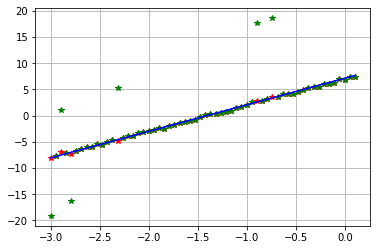

In [11]:
#Zadanie 1
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)
x = np.linspace(start, step, samples)

y = 5*x + 7 + np.random.normal(0, 0.2, size=x.shape)

X =np.array([
    x**1, x**0
]).T

y_outlier = y.copy()
y_outlier[13] += 10
y_outlier[0] -= 11
y_outlier[2] += 8
y_outlier[4] -= 9
y_outlier[40] += 15
y_outlier[43] += 15


num_iters = 100
sample_size = 5
threshold = 0.2
min_ratio = 0.85

data = np.hstack([X, y_outlier[:, np.newaxis]])

def data_sampler(data, sample_size):
    indices = np.arange(len(data))
    random_indices = np.random.choice(indices, size=sample_size, replace=False)
    sample = data[random_indices, :]
    return sample

def model_calculator(data):
    return np.linalg.inv(data[:, :-1].T @ data[:, :-1]) @ data[:, :-1].T @ data[:, -1]

def model_evaluator(data, model):
    return data[:, :-1] @ model

def ratio_calculator(transformed_data, data, threshold):
    error = (transformed_data - data[:, -1])**2
    inliers = np.sum(error < threshold)
    ratio = inliers / len(error)
    return ratio

def ransac(data, data_sampler, model_calculator, model_evaluator, ratio_calculator, threshold, sample_size, max_iters, min_ratio, out_threshold):
    best_ratio = -np.inf
    best_model = None
    indices = []
    for i in range(max_iters):
        sample = data_sampler(data, sample_size)
        current_model = model_calculator(sample)
        transformed = model_evaluator(data, current_model)
        ratio = ratio_calculator(transformed, data, threshold)
        if ratio > best_ratio:
            best_ratio = ratio
            best_model = current_model
        if best_ratio > min_ratio:
            break
    error = (model_evaluator(data, best_model) - data[:, -1])**2
    for i in range(len(data)):
        if(error[i] > out_threshold):
            indices.append(i)
    return best_ratio, best_model, indices

_, best_model, out_indices = ransac(data, data_sampler, model_calculator, model_evaluator, ratio_calculator, threshold, sample_size, num_iters, min_ratio, 0.5)

print("Best model: ", best_model)
print(out_indices)
y_new = X @ best_model

plt.figure()
plt.plot(x, y, "r*")
plt.plot(x, y_outlier, 'g*')
plt.plot(x, y_new, "b-")
plt.grid(True)
plt.show()

In [ ]:
#Zadanie 2
start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)
x = np.linspace(start, step, samples)

y = 5*x + 7 + np.random.normal(0, 0.2, size=x.shape)

X =np.array([
    x**1, x**0
]).T

y_outlier = y.copy()
y_outlier[0] -= 11
y_outlier[4] -= 9
y_outlier[40] += 15
y_outlier[43] += 15
y_outlier[41] += 15
y_outlier[10] += 25

plt.plot(x,y_outlier,"r*")
plt.grid(True)


data = np.hstack([X, y_outlier[:, np.newaxis]])


def gaussian_anomaly_detector(data,threshold):
    
    mean = data[:,2].mean()
    std = data[:,2].std()
    
    applier = []
    
    for i in range(len(data[:,2])):
        if ( 1 / (std * np.sqrt(2 * np.pi)) ) * np.exp( -(data[:,2][i] - mean)**2 / (2 * std**2) ) < threshold:
            ind = np.where(data[:,2] == data[:,2][i])[0]
            applier.append(ind[0])
        else:
            continue
    
    return applier

        
result = gaussian_anomaly_detector(data, 0.01)

print(result)

arr = np.array(result)